## NumPy, SciPy & Matplotlib

In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

### Exercise 1.1: Fun with numpy.linspace()

Create an array of of 20 elements with values ranging from 0 to 1, excluding 0 and 1

In [4]:
# Solution

x = np.linspace(0,1,21,endpoint=False)[1:]
print(x)

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429
 0.33333333 0.38095238 0.42857143 0.47619048 0.52380952 0.57142857
 0.61904762 0.66666667 0.71428571 0.76190476 0.80952381 0.85714286
 0.9047619  0.95238095]


### Exercise 1.2: Fun with numpy.reshape()

Form the following 2-D array (without typing it in explicitly):

$$
\begin{pmatrix}
   1 & 6 & 11 \\
   2 & 7 & 12 \\
   3 & 8 & 13 \\
   4 & 9 & 14 \\
   5 & 10 & 15 
\end{pmatrix}
$$

and generate a new array containing its 2nd and 4th rows.

(Copyright http://www.scipy-lectures.org/intro/numpy/exercises.html)

In [14]:
# Solution

x1 = np.arange(1,16).reshape((5,3),order='F')

x2 = x1[[1,3]]
print(x2)

[[ 2  7 12]
 [ 4  9 14]]


### Exercise 1.3: Harder one!

Generate a 10 x 3 array of random numbers in [0,1].

For each row, pick the number closest to 0.5.

    - Use abs and argmin to find the column j closest for each row

(Copyright http://www.scipy-lectures.org/intro/numpy/exercises.html)

In [50]:
#Solution

x1 = np.random.rand(10,3)
print(x1)

c05 = [x1[i] for i in list(zip(list(np.arange(10)),np.argmin(a=abs(x1 - 0.5),axis=1)))]
print(c05)
# OR DO THIS
x1[np.arange(10),np.argmin(a=abs(x1 - 0.5),axis=1)]

[[0.11891144 0.38814882 0.3976745 ]
 [0.49860133 0.97177095 0.07741933]
 [0.62704502 0.94870793 0.4122692 ]
 [0.52786442 0.32321531 0.31467171]
 [0.25115434 0.50678853 0.53502163]
 [0.28512659 0.17428223 0.44246517]
 [0.12797767 0.76089147 0.79923117]
 [0.22725638 0.10571606 0.06642622]
 [0.81191456 0.66904169 0.1012036 ]
 [0.1606839  0.51844201 0.07934176]]
[0.3976744989121179, 0.498601329198023, 0.4122692020769523, 0.5278644230555188, 0.5067885276709421, 0.442465165931776, 0.7608914715057853, 0.22725638438564888, 0.669041687874216, 0.5184420062945668]


array([0.3976745 , 0.49860133, 0.4122692 , 0.52786442, 0.50678853,
       0.44246517, 0.76089147, 0.22725638, 0.66904169, 0.51844201])

# Exercise 1.4: Reproduce the plot below

Three cycles of a sinus wave, logarithmically sampled with annotations

Please use the following functions: linspace(), geomspace(), plot(), scatter() and annotate()

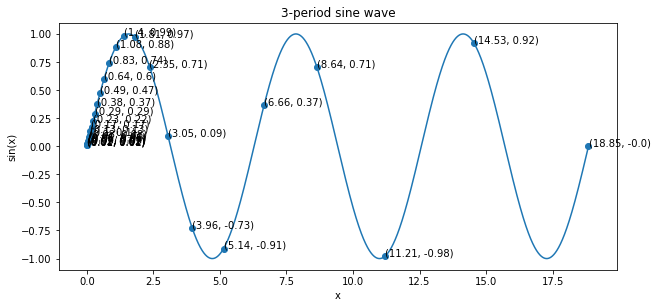

In [72]:
# Solution
import matplotlib.pyplot 
t = np.linspace(0.0, 6*np.pi, 10000)

dots = np.geomspace(start=0.01,stop=(6*np.pi),num=30)

fig = plt.figure(1,figsize=(10,10))

ax1 = fig.add_subplot(211)
ax1.plot(t, np.sin(2*np.pi*t*3/(6*np.pi)))
ax1.set_ylim((-1.1, 1.1))

# Scatter the points
ax1.scatter(dots,np.sin(2*np.pi*dots*3/(6*np.pi)) )

# Annotate the scatter points
for txt in zip(np.around(dots, decimals=2),np.around(np.sin(2*np.pi*dots*3/(6*np.pi)),decimals=2)):
    ax1.annotate(txt, txt)
    
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)')

ax1.set_title('3-period sine wave')
plt.show()


### Exercise 1.5: Sparse Matrices

Create a random array (element values between -1 and 1) with 10,000 elements, and two random arrays with 9,999 elements. Create a scipy sparse matrix (see [here](https://docs.scipy.org/doc/scipy/reference/sparse.html) for different types of sparse matrices) that has the first array on its main diagonal, the second one next to the main diagonal and above, and the third one just below the main diagonal. There are multiple ways to do this:
* Using the [diags](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html) function
* Using the constructors for sparse matrices (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) for an example)

This sparse matrix will take up much less space than a dense matrix would. To see this, you can densify this matrix (if you have enough RAM, be careful because it will take about 1 GB) and compare its size to the original sparse matrix (see [here](https://stackoverflow.com/questions/11784329/python-memory-usage-of-numpy-arrays) for details on getting the size in bytes).

Now, perform Singular Value Decomposition (SVD) on this matrix using one of SciPy's built-in functions. SVD is conceptually very similar to Principal Component Analysis (PCA) that we discussed during today's lecture (and is actually one way of calculating a PCA). Look at the singular values and how quickly they decline, and determine the number of dimensions you would keep to have a good approximation of the original matrix.

In [106]:
# Solution
from scipy.sparse import diags
r_array = 2*np.random.rand(10000) -1
r_array1 = 2*np.random.rand(9999) -1
r_array2 = 2*np.random.rand(9999) -1


In [108]:
diagonals = [r_array, r_array1, r_array2]
sparse_matrix = diags(diagonals, [0, 1, -1])

In [ ]:
from scipy.sparse.linalg import svds
u, s, vt = svds(sparse_matrix,k=9999)

In [ ]:
s

The values in S are not declining (because the for each row of the matrix we have only 3 columns distributed in such a way that the likelihood of having colinear columns is very lw)so we have to keep the whole 10000 dimensions 